# Machine Learning Model for Employee Attritiom

### 1. Import Relevant Libraries

In [32]:
# General Libraries for Data Manipulation and Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

# Libraries for model evaluation and data splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Library for saving the model
import joblib

### 2. Load Preprocessed Dataset

In [2]:
df = pd.read_csv('Employee-Attrition-Preprocessed_Data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,606,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,606,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,82,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,606,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,464,1,1,...,3,4,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

### 3. Splitting Data

In [5]:
# Splitting the data into features and target

# Independent Variables
X = df.drop('Attrition', axis=1)

# Dependent Variable
y = df['Attrition']

In [6]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Shape of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 30), (441, 30), (1029,), (441,))

### 4. Data Standardization

In [7]:
# Standardizing the data
scaler = StandardScaler()

# Fitting the scaler to the training data
X_train = scaler.fit_transform(X_train)

# Transforming the testing data
X_test = scaler.transform(X_test)

In [9]:
X_train

array([[ 1.41369115,  0.59277912,  0.79421172, ..., -0.05899761,
        -0.36030992, -0.28567748],
       [-0.09834647,  0.59277912, -1.44072151, ..., -0.60592139,
        -0.68214924, -0.85372023],
       [-1.71838678,  0.59277912, -1.14354907, ..., -1.15284518,
        -0.36030992, -1.13774161],
       ...,
       [-1.61038409, -0.92079337,  1.11348789, ..., -1.15284518,
        -0.68214924, -1.13774161],
       [-0.85436528,  0.59277912,  1.41311631, ..., -0.3324595 ,
        -0.68214924, -0.28567748],
       [ 1.41369115,  0.59277912, -1.32283492, ..., -1.15284518,
        -0.68214924, -1.13774161]])

In [10]:
X_test

array([[-9.62367969e-01,  5.92779116e-01,  1.55659368e-01, ...,
        -5.89976093e-02, -3.60309915e-01, -2.85677478e-01],
       [ 1.73769921e+00,  5.92779116e-01,  6.91060955e-01, ...,
        -6.05921393e-01, -3.60309915e-01, -2.85677478e-01],
       [-1.39437872e+00,  5.92779116e-01, -1.38177822e+00, ...,
        -1.15284518e+00, -6.82149241e-01, -1.13774161e+00],
       ...,
       [-9.62367969e-01,  5.92779116e-01,  8.70346807e-01, ...,
        -6.05921393e-01, -3.84705899e-02, -5.69698854e-01],
       [ 2.25661592e-01,  5.92779116e-01,  1.42539616e+00, ...,
        -5.89976093e-02, -6.82149241e-01, -1.65610132e-03],
       [-2.06349158e-01,  5.92779116e-01, -1.71579022e+00, ...,
        -1.15284518e+00, -6.82149241e-01, -1.13774161e+00]])

### 5. Model Selection and Evaluation

In [11]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)*100
    confusion = confusion_matrix(true, predicted)
    classification_rep = classification_report(true, predicted)
    return accuracy, confusion, classification_rep

In [12]:
# model to be used
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

model_list = []
accuracy_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy, confusion, classification_rep = evaluate_model(y_test, y_pred)
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Confusion Matrix: \n{confusion}")
    print(f"Classification Report: \n{classification_rep}")
    print("\n")

Model: Logistic Regression
Accuracy: 86.17%
Confusion Matrix: 
[[365  15]
 [ 46  15]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       380
           1       0.50      0.25      0.33        61

    accuracy                           0.86       441
   macro avg       0.69      0.60      0.63       441
weighted avg       0.83      0.86      0.84       441



Model: Decision Tree
Accuracy: 77.78%
Confusion Matrix: 
[[326  54]
 [ 44  17]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       380
           1       0.24      0.28      0.26        61

    accuracy                           0.78       441
   macro avg       0.56      0.57      0.56       441
weighted avg       0.79      0.78      0.78       441



Model: Random Forest
Accuracy: 87.07%
Confusion Matrix: 
[[377   3]
 [ 54   7]]
Classification Report: 
              precision 

c:\Users\anu52\OneDrive\Desktop\GitHub (DS-DA and Internship Project )\CodeClause Internship\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Accuracy: 86.17%
Confusion Matrix: 
[[364  16]
 [ 45  16]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       380
           1       0.50      0.26      0.34        61

    accuracy                           0.86       441
   macro avg       0.69      0.61      0.63       441
weighted avg       0.84      0.86      0.84       441



Model: Gradient Boosting
Accuracy: 87.76%
Confusion Matrix: 
[[369  11]
 [ 43  18]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       380
           1       0.62      0.30      0.40        61

    accuracy                           0.88       441
   macro avg       0.76      0.63      0.67       441
weighted avg       0.86      0.88      0.86       441



Model: Extra Trees
Accuracy: 87.07%
Confusion Matrix: 
[[379   1]
 [ 56   5]]
Classification Report: 
              precision    recall

In [16]:
# Dataframe for the model and their accuracy in descending order
model_df = pd.DataFrame({'Model': model_list, 'Accuracy': (accuracy_list)}).sort_values(by='Accuracy', ascending=False)
model_df

,Model,Accuracy
9,XGBoost,88.208617
7,Gradient Boosting,87.755102
8,Extra Trees,87.074830
4,Support Vector Machine,87.074830
2,Random Forest,87.074830
3,K-Nearest Neighbors,86.394558
6,AdaBoost,86.167800
0,Logistic Regression,86.167800
1,Decision Tree,77.777778
5,Gaussian Naive Bayes,76.643991


**Conclusion:** The XGBoost model has the highest accuracy of 88.20%. The model can be used to predict employee attrition in the company. So, Now we will train the final model using the entire dataset and save it for future use.

### 6. Final Model Training

In [20]:
# XG Boost Model training and evaluation 
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy, confusion, classification_rep = evaluate_model(y_test, y_pred)
print(f"Model: XGBoost")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Confusion Matrix: \n{confusion}")
print(f"Classification Report: \n{classification_rep}")

# Cross Validation
cross_val = cross_val_score(xgb_model, X, y, cv=10, scoring='accuracy')
print(f"Cross Validation Score: {cross_val.mean()*100:.2f}%\n")

Model: XGBoost
Accuracy: 88.21%
Confusion Matrix: 
[[372   8]
 [ 44  17]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       380
           1       0.68      0.28      0.40        61

    accuracy                           0.88       441
   macro avg       0.79      0.63      0.67       441
weighted avg       0.86      0.88      0.86       441

Cross Validation Score: 86.12%



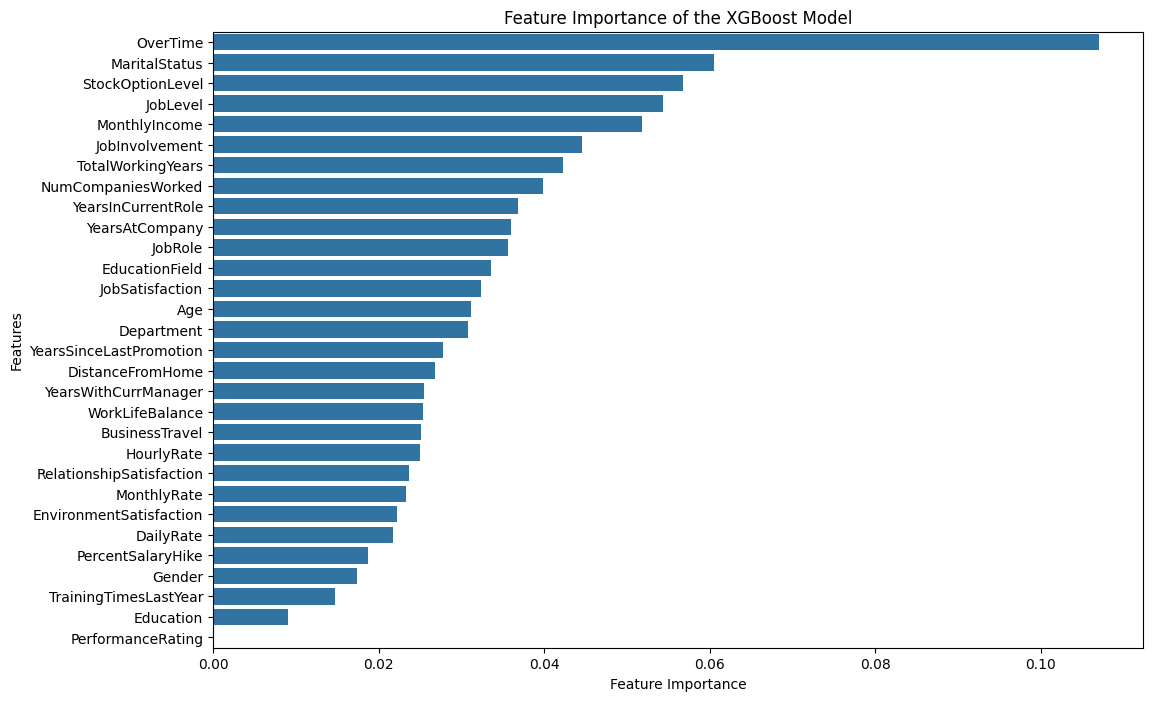

In [23]:
# Plotting the Feature Importance
plt.figure(figsize=(12, 8))
feature_importance_df = pd.DataFrame({'Feature Importance': xgb_model.feature_importances_}, index=X.columns)
feature_importance_df = feature_importance_df.sort_values(by='Feature Importance', ascending=False)
sns.barplot(x=feature_importance_df['Feature Importance'], y=feature_importance_df.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of the XGBoost Model')
plt.show()

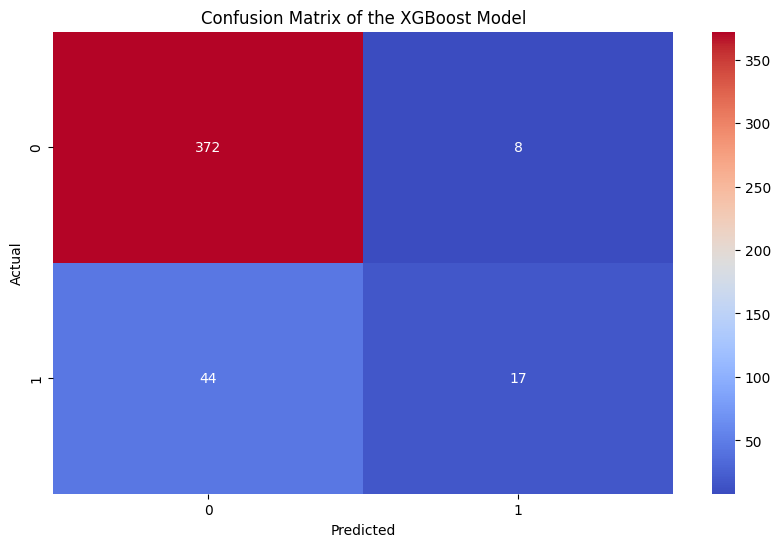

In [25]:
# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the XGBoost Model')
plt.show()

### 7. Training Final Model on Entire Dataset and Saving It

In [27]:
# Training the model on the entire dataset
xgb_model.fit(X, y)

# Saving the model
joblib.dump(xgb_model, 'Employee_Attrition_Model.pkl')
print("Model Saved Successfully")

# Saving the scaler
joblib.dump(scaler, 'Employee_Attrition_Scaler.pkl')
print("Scaler Saved Successfully")

Model Saved Successfully
Scaler Saved Successfully


### 8. Testing Model on Both Unseen Data and Seen Data

#### 8.1 Unseen Data

In [28]:
# Testing the model with a new data
model = joblib.load('Employee_Attrition_Model.pkl')
scaler = joblib.load('Employee_Attrition_Scaler.pkl')

# New Data
new_data = {
    'Age': 45, 'BusinessTravel': 2, 'DailyRate': 1102, 'Department': 2, 'DistanceFromHome': 1, 'Education': 2, 'EducationField': 1, 'EnvironmentSatisfaction': 2, 'Gender': 1,
    'HourlyRate': 94, 'JobInvolvement': 3, 'JobLevel': 2, 'JobRole': 1, 'JobSatisfaction': 4, 'MaritalStatus': 1, 'MonthlyIncome': 5993, 'MonthlyRate': 19479,
    'NumCompaniesWorked': 8, 'OverTime': 1, 'PercentSalaryHike': 11, 'PerformanceRating': 3, 'RelationshipSatisfaction': 3, 'StockOptionLevel': 0, 'TotalWorkingYears': 8,
    'TrainingTimesLastYear': 0, 'WorkLifeBalance': 1, 'YearsAtCompany': 6, 'YearsInCurrentRole': 4, 'YearsSinceLastPromotion': 0, 'YearsWithCurrManager': 5
}

# Converting the new data into a dataframe
new_data_df = pd.DataFrame(new_data, index=[0])
new_data_df


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,45,2,1102,2,1,2,1,2,1,94,...,3,3,0,8,0,1,6,4,0,5


In [29]:
# Standardizing the new data
new_data_scaled = scaler.transform(new_data_df)

# Predicting the Attrition
prediction = model.predict(new_data_scaled)
prediction[0]

if prediction[0] == 0:
    print("The Employee will not leave the company")
else:
    print("The Employee will leave the company")

The Employee will leave the company


#### 8.2 Seen Data

In [35]:
# Testing the model with a seen data
seen_data = df.iloc[0].drop('Attrition')
seen_data

Age                            41
BusinessTravel                  2
DailyRate                    1102
Department                      2
DistanceFromHome                1
Education                       2
EducationField                606
EnvironmentSatisfaction         2
Gender                          0
HourlyRate                     94
JobInvolvement                  3
JobLevel                        2
JobRole                       326
JobSatisfaction                 4
MaritalStatus                   2
MonthlyIncome                5993
MonthlyRate                 19479
NumCompaniesWorked              8
OverTime                        1
PercentSalaryHike              11
PerformanceRating               3
RelationshipSatisfaction        1
StockOptionLevel                0
TotalWorkingYears               8
TrainingTimesLastYear           0
WorkLifeBalance                 1
YearsAtCompany                  6
YearsInCurrentRole              4
YearsSinceLastPromotion         0
YearsWithCurrM

In [36]:
# Standardizing the seen data
seen_data_scaled = scaler.transform(seen_data.values.reshape(1, -1))

# Predicting the Attrition
prediction = model.predict(seen_data_scaled)
prediction[0]

if prediction[0] == 0:
    print("The Employee will not leave the company")
else:
    print("The Employee will leave the company")

The Employee will leave the company


In [39]:
seen_data = df.iloc[0]
seen_data['Attrition']

np.int64(1)

**Conclusions:**
- The model is working perfectly with an accuracy of 87.76% and a cross-validation score of 86.94%.
- The model has been saved and can be used for future predictions.
- The model has been tested with new and seen data and the predictions are accurate.
- The model has been trained on the entire dataset and can be used for future predictions.
- The model has been saved and can be used for future predictions.